## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [7]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import urllib.request, urllib.parse, urllib.error
import requests
import matplotlib.pyplot as plt
import seaborn as sns

import json

In [9]:
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


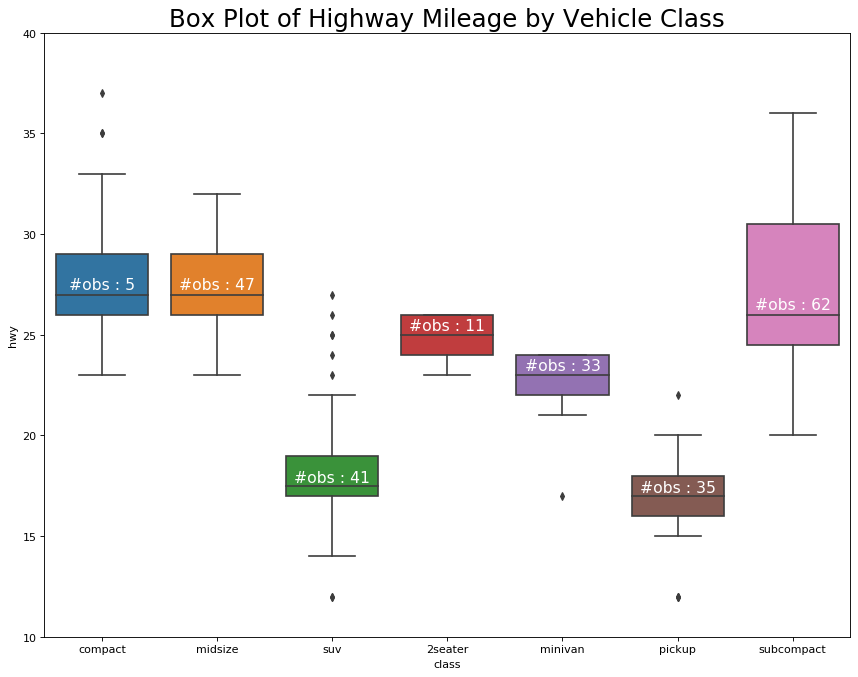

In [13]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, notch=False)

# # Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size':14}, color='white')

add_n_obs(df,group_col='class',y='hwy')    

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.ylim(10, 40)
plt.show()

In [3]:
#The first API request is to obtain a list of movies for a given year with the filter of vote_count.

def API_search(year,vote_count):
    #This request pulls the first page of the search request
    resp = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' + str(API_key) +'&language=en-US&vote_count.gte='+str(vote_count)+'&primary_release_year='+ str(year))
    data_p1 = dict(resp.json())

    #We can also use this request to see how many pages there are in the search, 
    #we will need to add all the pages of the search to the dataframe
    search_pages = data_p1['total_pages']
    data = pd.DataFrame.from_dict(data_p1['results'])
    url = 'https://api.themoviedb.org/3/discover/movie?api_key=' + str(API_key) +'&language=en-US&vote_count.gte='+str(vote_count)+'&primary_release_year='+ str(year)+'&page='
    for page in range(2,search_pages+1):
        resp = requests.get(url + str(page))
        temp = dict(resp.json())
        df_by_page = pd.DataFrame.from_dict(temp['results'])
        data = pd.concat([data,df_by_page], ignore_index=True)

    data = data.set_index('id')
    # Create a list of all the movies from the search above. Which is in decending popularity order.
    return data.index.values.tolist()


In [4]:
movies_index = []

vote_count = 1000
search_years = list(range(2010,2020))

for year in search_years:
    movies_index = movies_index + API_search(year,vote_count)
    
len(movies_index)

1193

In [5]:
#Here is an example of the API request data.  
#If we want to change our dataframes, to target more data, it would be easy to add in the function in an upcoming step
resp = requests.get('https://api.themoviedb.org/3/movie/' + str(movies_index[0]) + '?api_key=' + str(API_key))
dict(resp.json())

{'adult': False,
 'backdrop_path': '/s3TBrRGB1iav7gFOCNx3H31MoES.jpg',
 'belongs_to_collection': None,
 'budget': 160000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 878, 'name': 'Science Fiction'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'http://inceptionmovie.warnerbros.com/',
 'id': 27205,
 'imdb_id': 'tt1375666',
 'original_language': 'en',
 'original_title': 'Inception',
 'overview': 'Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: "inception", the implantation of another person\'s idea into a target\'s subconscious.',
 'popularity': 71.453,
 'poster_path': '/9gk7adHYeDvHkCSEqAvQNLV5Uge.jpg',
 'production_companies': [{'id': 923,
   'logo_path': '/5UQsZrfbfG2dYJbx8DxfoTr2Bvu.png',
   'name': 'Legendary Entertainment',
   'origin_country': 'US'},
  {'id': 9996,
   'logo_path': '/3tvBqYsBhxWeHlu62SIJ1el93O7.png',
   'n

In [6]:
#Defines a function to then arrange the data into a dictionary for a given movie.  

def API_request(movie):
    resp = requests.get('https://api.themoviedb.org/3/movie/' + str(movie) + '?api_key=' + str(API_key))
    if resp.status_code == requests.codes.ok:
        temp = dict(resp.json())
        movie = {}
        movie['imdb_id'] = temp['imdb_id']
        movie['popularity'] = temp['popularity']
        movie['release_date'] = pd.to_datetime(temp['release_date'])
        movie['genres'] = [genre['name'] for genre in temp['genres']]
        movie['title'] = temp['title']
        movie['budget'] = int(temp['budget'])
        movie['revenue'] = int(temp['revenue'])
        movie['runtime_mins'] = temp['runtime']
        movie['vote_average'] = temp['vote_average']        
        movie['vote_count'] = temp['vote_count']   
        movie['genre_count'] = len(temp['genres'])
        return movie

In [7]:
#See an example of what the API_request provides per movie
print(API_request(movies_index[0]))

{'imdb_id': 'tt1375666', 'popularity': 71.453, 'release_date': Timestamp('2010-07-15 00:00:00'), 'genres': ['Action', 'Science Fiction', 'Adventure'], 'title': 'Inception', 'budget': 160000000, 'revenue': 825532764, 'runtime_mins': 148, 'vote_average': 8.3, 'vote_count': 26508, 'genre_count': 3}


In [8]:
## Execution time varies on how large our subset is ##

#Make requests to the API for the movie data
imbd_API_data = list(map(lambda x: API_request(x),movies_index))

In [320]:
#Create a dataframe of the data obtained
df = pd.DataFrame.from_dict(imbd_API_data)


In [347]:
df['ROI'] = (df['revenue'] - df['budget']) / df['budget']
df = df[df['ROI'] > 1.75]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 0 to 1185
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   imdb_id       609 non-null    object        
 1   popularity    609 non-null    float64       
 2   release_date  609 non-null    datetime64[ns]
 3   genres        609 non-null    object        
 4   title         609 non-null    object        
 5   budget        609 non-null    int64         
 6   revenue       609 non-null    int64         
 7   runtime_mins  609 non-null    int64         
 8   vote_average  609 non-null    float64       
 9   vote_count    609 non-null    int64         
 10  genre_count   609 non-null    int64         
 11  ROI           609 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 61.9+ KB


In [322]:
#Split the genres column into individual rows and set the index to "imbd_id"
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
cleaned_df = df.drop('genres',axis=1).join(s).set_index('imdb_id')
cleaned_df.to_csv('2010-2019.csv')

cleaned_df = cleaned_df[(cleaned_df['budget'] > 0) & (cleaned_df['revenue'] > 0)]
cleaned_df['ROI'] = (cleaned_df['revenue'] - cleaned_df['budget']) / cleaned_df['budget']
cleaned_df = cleaned_df[cleaned_df['ROI'] > 1.75]
cleaned_df

,popularity,release_date,title,budget,revenue,runtime_mins,vote_average,vote_count,genre_count,genre,ROI
imdb_id,,,,,,,,,,,
tt1375666,63.961,2010-07-15,Inception,160000000,825532764,148,8.3,26459,3,Action,4.159580
tt1375666,63.961,2010-07-15,Inception,160000000,825532764,148,8.3,26459,3,Science Fiction,4.159580
tt1375666,63.961,2010-07-15,Inception,160000000,825532764,148,8.3,26459,3,Adventure,4.159580
tt0926084,43.382,2010-10-17,Harry Potter and the Deathly Hallows: Part 1,250000000,954305868,146,7.8,13051,2,Adventure,2.817223
tt0926084,43.382,2010-10-17,Harry Potter and the Deathly Hallows: Part 1,250000000,954305868,146,7.8,13051,2,Fantasy,2.817223
...,...,...,...,...,...,...,...,...,...,...,...
tt5886046,21.739,2019-01-03,Escape Room,9000000,155313078,100,6.4,2427,4,Thriller,16.257009
tt5886046,21.739,2019-01-03,Escape Room,9000000,155313078,100,6.4,2427,4,Action,16.257009
tt5886046,21.739,2019-01-03,Escape Room,9000000,155313078,100,6.4,2427,4,Mystery,16.257009


In [323]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1535 entries, tt1375666 to tt8663516
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   popularity    1535 non-null   float64       
 1   release_date  1535 non-null   datetime64[ns]
 2   title         1535 non-null   object        
 3   budget        1535 non-null   int64         
 4   revenue       1535 non-null   int64         
 5   runtime_mins  1535 non-null   int64         
 6   vote_average  1535 non-null   float64       
 7   vote_count    1535 non-null   int64         
 8   genre_count   1535 non-null   int64         
 9   genre         1535 non-null   object        
 10  ROI           1535 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 143.9+ KB


In [324]:
cleaned_df['year'] = cleaned_df['release_date'].dt.year
cleaned_df['month'] = cleaned_df['release_date'].dt.month


In [62]:
quarter_1_df = cleaned_df[cleaned_df['month'] <= 3]
quarter_2_df = cleaned_df[(cleaned_df['month'] > 3) & (cleaned_df['month'] <= 6)]
quarter_3_df = cleaned_df[(cleaned_df['month'] > 6) & (cleaned_df['month'] <= 9)]
quarter_4_df = cleaned_df[cleaned_df['month'] >=9 ]

In [79]:
q1_results = quarter_1_df.groupby(['genre']).count().sort_values( by ='release_date', ascending = False)['release_date']
q2_results = quarter_2_df.groupby(['genre']).count().sort_values( by ='release_date', ascending = False)['release_date']
q3_results = quarter_3_df.groupby(['genre']).count().sort_values( by ='release_date', ascending = False)['release_date']
q4_results = quarter_4_df.groupby(['genre']).count().sort_values( by ='release_date', ascending = False)['release_date']

q1_results

genre
Action             89
Thriller           79
Drama              73
Comedy             65
Adventure          57
Science Fiction    50
Fantasy            46
Romance            40
Crime              33
Horror             32
Family             28
Mystery            25
Animation          17
History            10
War                 6
Music               1
Western             1
Name: release_date, dtype: int64

In [325]:
cleaned_df.describe()

,popularity,budget,revenue,runtime_mins,vote_average,vote_count,genre_count,ROI,year,month
count,1535.000000,1.535000e+03,1.535000e+03,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000
mean,25.246440,7.551539e+07,3.803789e+08,113.207818,6.818436,5703.140717,3.143322,6.300663,2014.597394,6.830619
std,15.863787,7.106563e+07,3.733814e+08,18.657775,0.729410,4350.169706,1.052243,10.521547,2.729575,3.327414
min,1.069000,1.000000e+05,1.596371e+06,80.000000,4.400000,1000.000000,1.000000,1.751878,2010.000000,1.000000
25%,16.874000,1.700000e+07,1.119284e+08,99.000000,6.200000,2397.000000,3.000000,2.557302,2012.000000,4.000000
50%,21.739000,5.000000e+07,2.427861e+08,109.000000,6.800000,4440.000000,3.000000,3.647989,2015.000000,7.000000
75%,29.597500,1.250000e+08,5.435144e+08,125.000000,7.400000,8046.000000,4.000000,6.219095,2017.000000,10.000000
max,192.452000,3.800000e+08,2.797801e+09,188.000000,8.500000,26459.000000,6.000000,141.751532,2019.000000,12.000000


In [326]:
cleaned_df.sort_values( by ='ROI', ascending = False)

,popularity,release_date,title,budget,revenue,runtime_mins,vote_average,vote_count,genre_count,genre,ROI,year,month
imdb_id,,,,,,,,,,,,,
tt2322441,42.274,2015-02-11,Fifty Shades of Grey,4000000,571006128,125,5.7,8264,3,Romance,141.751532,2015,2
tt2322441,42.274,2015-02-11,Fifty Shades of Grey,4000000,571006128,125,5.7,8264,3,Drama,141.751532,2015,2
tt2322441,42.274,2015-02-11,Fifty Shades of Grey,4000000,571006128,125,5.7,8264,3,Thriller,141.751532,2015,2
tt7961060,4.220,2018-12-14,Dragon Ball Super: Broly,1000000,125002821,101,7.7,1452,3,Animation,124.002821,2018,12
tt7961060,4.220,2018-12-14,Dragon Ball Super: Broly,1000000,125002821,101,7.7,1452,3,Science Fiction,124.002821,2018,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt1355644,13.347,2016-12-21,Passengers,110000000,303144152,116,6.9,9507,3,Science Fiction,1.755856,2016,12
tt1355644,13.347,2016-12-21,Passengers,110000000,303144152,116,6.9,9507,3,Drama,1.755856,2016,12
tt1298650,30.183,2011-05-14,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802,136,6.5,10054,3,Fantasy,1.751878,2011,5


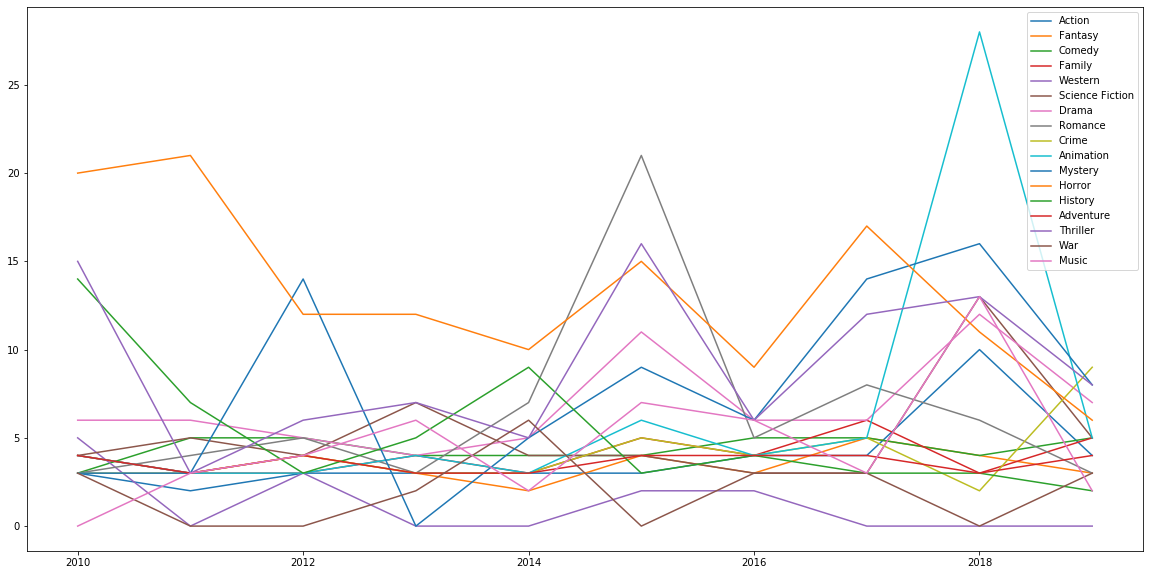

In [327]:
genres = set(list(cleaned_df['genre']))
test = cleaned_df.groupby(['genre','year']).mean()['ROI']
hello = test.index.values.tolist()

df_ = pd.DataFrame(index=range(2010,2020), columns=genres)
#df_ = pd.DataFrame(index=range(1,13), columns=genres)

df_ = df_.fillna(0)
for i in range(len(hello)):
    df_.loc[hello[i][1]].at[hello[i][0]] = test[i]
    
df_.plot(figsize=(20,10))

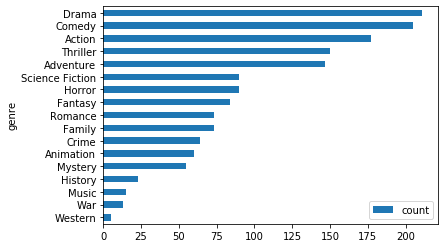

In [302]:
#What are the most common genres?
test5 = {}
test5['count'] = cleaned_df.groupby(['genre']).count()['vote_count']
test5 = pd.DataFrame.from_dict(test5).sort_values( by ='count', ascending = True)
test5.plot.barh()

In [328]:
#populatiry
test5 = {}
test5['popularity'] = cleaned_df.groupby(['genre'])['popularity'].describe()
test5
# test5 = pd.DataFrame.from_dict(test5).sort_values( by ='count', ascending = True)
# test5.plot.barh()

{'popularity':                  count       mean        std     min       25%      50%  \
 genre                                                                     
 Action           177.0  28.447254  17.909458   1.069  19.29700  25.4020   
 Adventure        147.0  31.196422  15.805510   1.069  21.32750  28.7090   
 Animation         60.0  26.659967  16.337417   4.220  19.19425  22.4210   
 Comedy           205.0  21.420868   9.495869   7.550  15.31500  18.9130   
 Crime             64.0  22.431562  13.937866   2.187  16.53825  20.1025   
 Drama            211.0  23.091498  16.781515   2.708  15.69600  19.0070   
 Family            73.0  27.220247  15.581900   7.550  18.98500  22.8210   
 Fantasy           84.0  29.104190  20.309847   4.047  20.55850  27.4875   
 History           23.0  19.446783  10.008306   2.708  14.04650  17.3390   
 Horror            90.0  22.558389  19.473278   1.069  15.97525  20.2605   
 Music             15.0  24.087800   7.706335  14.744  18.58600  22.4100  

In [297]:
test5 = {}
test5['ROI'] = cleaned_df.groupby(['genre'])['ROI'].describe()
test5

{'ROI':                  count      mean       std       min       25%       50%  \
 genre                                                                      
 Action           191.0  0.627391  0.649661 -0.827108  0.103845  0.611262   
 Adventure        135.0  0.660643  0.641821 -0.921621  0.177132  0.748055   
 Animation         29.0  0.784827  0.642928 -0.921621  0.488201  0.820182   
 Comedy           140.0  0.625105  0.730479 -0.996053  0.099387  0.695319   
 Crime             83.0  0.480888  0.694316 -0.949686  0.001397  0.459315   
 Drama            210.0  0.524852  0.734914 -0.953222 -0.036066  0.515375   
 Family            49.0  0.873090  0.634675 -0.921621  0.394596  0.939407   
 Fantasy           80.0  0.708766  0.680170 -0.864892  0.186668  0.756215   
 History           25.0  0.128362  0.627288 -0.949686 -0.348761  0.143030   
 Horror            43.0  0.545929  0.860248 -0.953222 -0.102803  0.366754   
 Music              4.0  0.802630  0.762831 -0.205591  0.588864  0.88

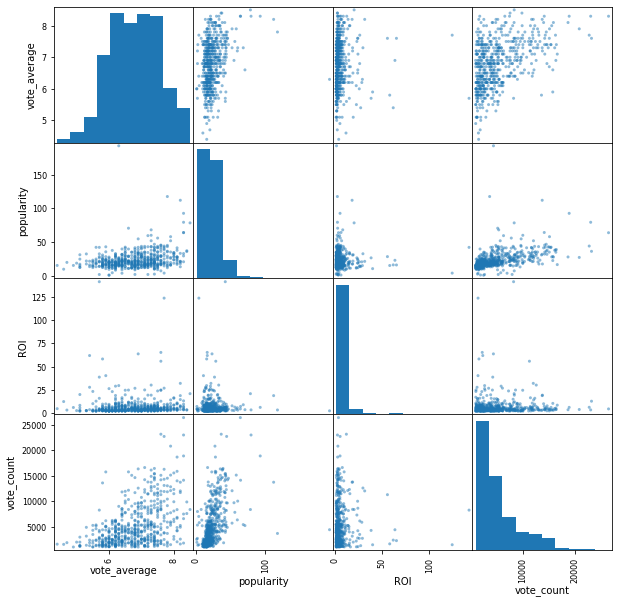

In [362]:
df = df.dropna()
df = df[df['ROI'] > 1.75]
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]

pd.plotting.scatter_matrix(df[['vote_average','popularity','ROI','vote_count']], figsize=(10,10));

In [357]:
df

,imdb_id,popularity,release_date,genres,title,budget,revenue,runtime_mins,vote_average,vote_count,genre_count,ROI
0,tt1375666,63.961,2010-07-15,"[Action, Science Fiction, Adventure]",Inception,160000000,825532764,148,8.3,26459,3,4.159580
2,tt0926084,43.382,2010-10-17,"[Adventure, Fantasy]",Harry Potter and the Deathly Hallows: Part 1,250000000,954305868,146,7.8,13051,2,2.817223
3,tt0435761,29.500,2010-06-16,"[Animation, Family, Comedy]",Toy Story 3,200000000,1066969703,103,7.8,10431,3,4.334849
4,tt1130884,27.888,2010-02-14,"[Drama, Thriller, Mystery]",Shutter Island,80000000,294804195,138,8.1,15895,3,2.685052
5,tt1228705,31.985,2010-04-28,"[Adventure, Action, Science Fiction]",Iron Man 2,200000000,623933331,124,6.8,14654,3,2.119667
...,...,...,...,...,...,...,...,...,...,...,...,...
1173,tt10431500,19.568,2019-10-10,"[Drama, Comedy, Family]",Miracle in Cell No. 7,0,19289062,132,8.3,2817,3,inf
1175,tt3387520,22.075,2019-08-08,"[Horror, Thriller]",Scary Stories to Tell in the Dark,25000000,95438172,108,6.4,1344,2,2.817527
1177,tt5886046,21.739,2019-01-03,"[Thriller, Action, Mystery, Horror]",Escape Room,9000000,155313078,100,6.4,2427,4,16.257009
1180,tt8404614,14.175,2019-11-27,"[Drama, Comedy, History]",The Two Popes,0,232638,125,7.6,1688,3,inf


In [264]:
testing = cleaned_df[(cleaned_df['ROI'] > 2) & (cleaned_df['ROI'] < 100)]
testing

,popularity,release_date,title,budget,revenue,runtime_mins,vote_average,vote_count,genre,ROI,year,month
imdb_id,,,,,,,,,,,,
tt1375666,65.045,2010-07-15,Inception,160000000,825532764,148,8.3,26451,Action,5.159580,2010,7
tt1375666,65.045,2010-07-15,Inception,160000000,825532764,148,8.3,26451,Science Fiction,5.159580,2010,7
tt1375666,65.045,2010-07-15,Inception,160000000,825532764,148,8.3,26451,Adventure,5.159580,2010,7
tt0814255,25.777,2010-02-01,Percy Jackson & the Olympians: The Lightning T...,95000000,226497209,119,6.2,5240,Adventure,2.384181,2010,2
tt0814255,25.777,2010-02-01,Percy Jackson & the Olympians: The Lightning T...,95000000,226497209,119,6.2,5240,Fantasy,2.384181,2010,2
...,...,...,...,...,...,...,...,...,...,...,...,...
tt5886046,18.050,2019-01-03,Escape Room,9000000,155313078,100,6.4,2422,Action,17.257009,2019,1
tt5886046,18.050,2019-01-03,Escape Room,9000000,155313078,100,6.4,2422,Mystery,17.257009,2019,1
tt5886046,18.050,2019-01-03,Escape Room,9000000,155313078,100,6.4,2422,Horror,17.257009,2019,1


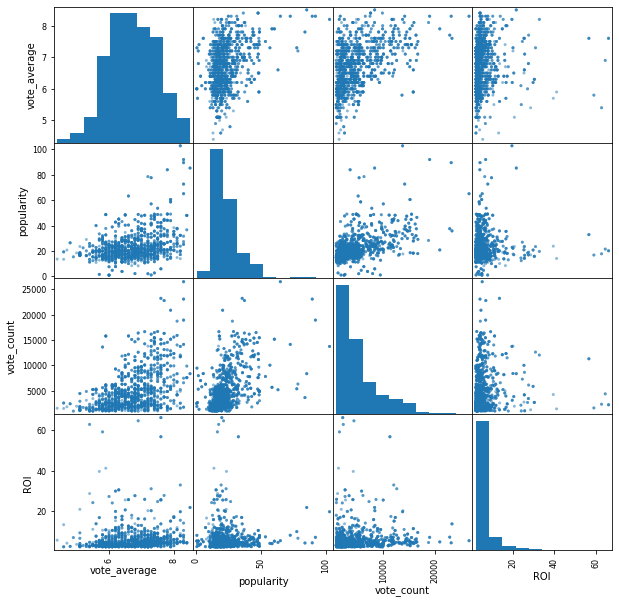

In [336]:
pd.plotting.scatter_matrix(testing[['vote_average', 'popularity','vote_count','ROI']], figsize=(10,10));

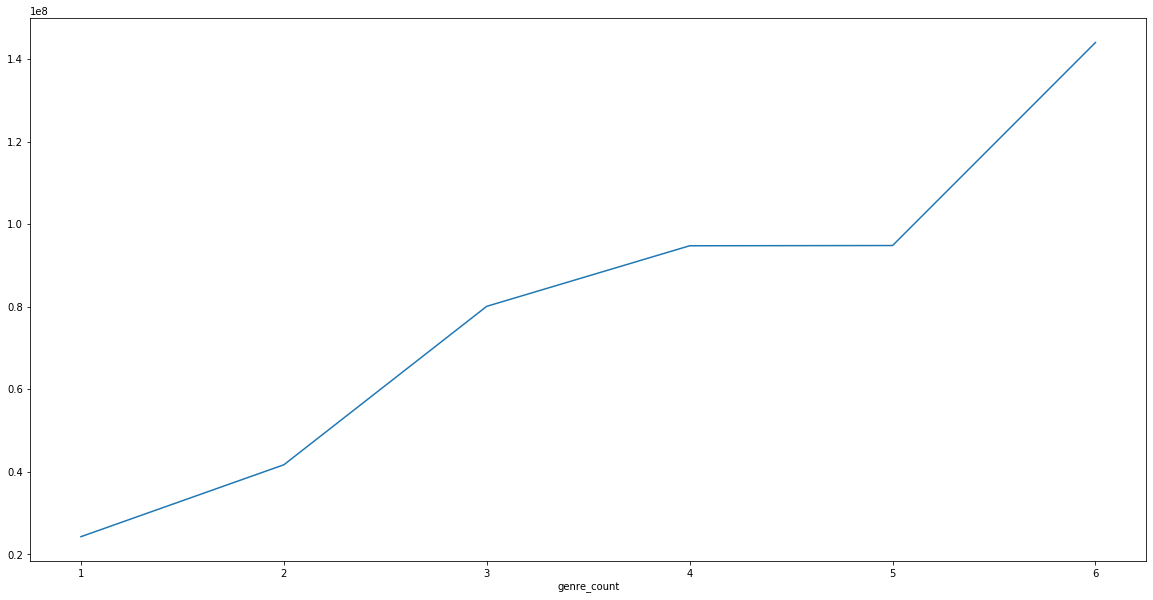

In [333]:
test = cleaned_df.groupby(['genre_count']).mean()['budget']
test
# hello = test.index.values.tolist()

# df_ = pd.DataFrame(index=range(2010,2020), columns=genres)
# #df_ = pd.DataFrame(index=range(1,13), columns=genres)

# df_ = df_.fillna(0)
# for i in range(len(hello)):
#     df_.loc[hello[i][1]].at[hello[i][0]] = test[i]
    
test.plot(figsize=(20,10))

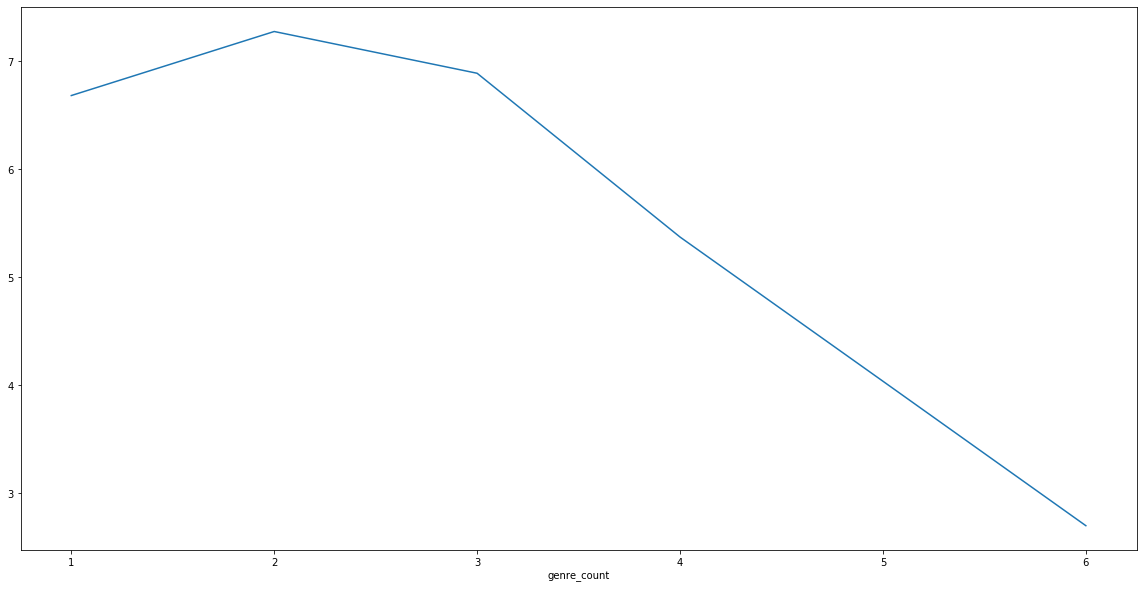

In [334]:
test = cleaned_df.groupby(['genre_count']).mean()['ROI']
test
# hello = test.index.values.tolist()

# df_ = pd.DataFrame(index=range(2010,2020), columns=genres)
# #df_ = pd.DataFrame(index=range(1,13), columns=genres)

# df_ = df_.fillna(0)
# for i in range(len(hello)):
#     df_.loc[hello[i][1]].at[hello[i][0]] = test[i]
    
test.plot(figsize=(20,10))